# Analysis 3 - Sentiment Analysis

Here I will do sentiment analysis on review table

In [5]:
#Sentiment analysis is a technique in natural language processing which aims to retrieve the "sentiment" of a piece 
#of text—positive, negative, or neutral. This is an easy way of summarizing the contents of a piece of text, 
#and one that is easily understood.

import numpy as np
import pandas as pd
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()


reviews = pd.read_csv("../finaldata/reviews_all.csv", encoding = "ISO-8859-1",low_memory=False)




In [6]:
#reviews contain null values

reviews_df = [r for r in reviews['comments'] if pd.notnull(r)]

In [9]:
#which city you want to do the sentiment analysis for?

cityvar='boston'

In [10]:
# using SentimentIntensityAnalyzer() function from nltk library give use a list of four values for each comment:
#compound, positivity, negativity and neutrality

pscore= reviews['comments'][reviews['city']==cityvar].apply(lambda x: sid.polarity_scores(x) if pd.notnull(x) else {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0} )


In [11]:
#creating a dataframe containing reviews and polarity scores
scored_reviews = pd.DataFrame()
scored_reviews[['comments','city']] = reviews[['comments','city']][reviews['city']==cityvar]
scored_reviews['compound'] = [score['compound'] for score in pscore]
scored_reviews['negativity'] = [score['neg'] for score in pscore]
scored_reviews['neutrality'] = [score['neu'] for score in pscore]
scored_reviews['positivity'] = [score['pos'] for score in pscore]

In [12]:
#writing the dataframe to csv

scored_reviews.to_csv(cityvar+"_polarity_scores.csv")

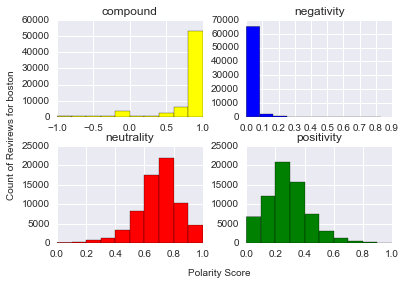

In [13]:
#creating a plot with 4 subplots, each for one of the polarity scores

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches


fig, axes = plt.subplots(2, 2, sharex=False, sharey=False) 

polarity= ['compound','neutrality','negativity','positivity']
color=["yellow", "red", "blue", "green"]
for i in range(2):
    for j in range(2):
        
        axes[i, j].hist(pd.Series(scored_reviews[polarity[i+j*2]]), color=color[i+j*2])
        axes[i,j].title.set_text(polarity[i+j*2])
      
plt.subplots_adjust(wspace=0.3, hspace=0.3)


fig.text(0.5, 0.02, 'Polarity Score', ha='center', va='center')
fig.text(0.02, 0.5, 'Count of Revirews for '+cityvar, ha='center', va='center', rotation='vertical')

plt.savefig(cityvar+'_subplots.png',bbox_inches='tight')

plt.show()

Almost none of the texts are classified as having significant amounts of negativity! 
In fact, a significant amount of them are given exactly 0.0 negativity.

Although the compound score is supposed to be the best estimate of overall sentiment , the fact that negativities are ranked so lowly and neutralities so high hints that we're doing a not so great job with this.